# Question 1 

In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"
users = pd.read_csv(url, delimiter='|', index_col='user_id')

In [2]:
users.head()


,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [3]:
users.groupby('occupation')['age'].mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [4]:
g1=users[users['gender']=='M'].groupby('occupation').count()['gender']
g2=users.groupby('occupation').count()['gender']
r=(g1/g2)*100
r.sort_values(ascending=False)

occupation
doctor           100.000000
engineer          97.014925
technician        96.296296
retired           92.857143
programmer        90.909091
executive         90.625000
scientist         90.322581
entertainment     88.888889
lawyer            83.333333
salesman          75.000000
educator          72.631579
student           69.387755
other             65.714286
marketing         61.538462
writer            57.777778
none              55.555556
administrator     54.430380
artist            53.571429
librarian         43.137255
healthcare        31.250000
homemaker         14.285714
Name: gender, dtype: float64

In [5]:
users.groupby('occupation').age.agg([min,max])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [6]:
users.groupby(['occupation', 'gender'])['age'].mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [7]:
g1=users[users['gender']=='M'].groupby('occupation').count()['gender']
g2=users.groupby('occupation').count()['gender']
r=pd.DataFrame((g1/g2)*100)
r.columns=[('M')]
r

,M
occupation,
administrator,54.430380
artist,53.571429
doctor,100.000000
educator,72.631579
engineer,97.014925
entertainment,88.888889
executive,90.625000
healthcare,31.250000
homemaker,14.285714


In [8]:
g3=users[users['gender']=='F'].groupby('occupation').count()['gender']
g2=users.groupby('occupation').count()['gender']
r2=pd.DataFrame((g3/g2)*100)
r2.columns=['F']
r2['M']=r['M']
r2

,F,M
occupation,,
administrator,45.569620,54.430380
artist,46.428571,53.571429
doctor,NaN,100.000000
educator,27.368421,72.631579
engineer,2.985075,97.014925
entertainment,11.111111,88.888889
executive,9.375000,90.625000
healthcare,68.750000,31.250000
homemaker,85.714286,14.285714


# Question 2

In [9]:
import numpy as np
import pandas as pd

In [10]:
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
euro = pd.read_csv(url)

In [11]:
euro.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [12]:
euro['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [13]:
euro['Team'].count()

16

In [14]:
len(euro.columns)

35

In [15]:
discipline=euro[['Team','Yellow Cards','Red Cards']]

In [16]:
discipline=euro[['Team','Yellow Cards','Red Cards']]
discipline.head()

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0


In [17]:
discipline.sort_values(by=['Red Cards','Yellow Cards'])

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


In [18]:

discipline.groupby('Team').mean()['Yellow Cards']

Team
Croatia                 9.0
Czech Republic          7.0
Denmark                 4.0
England                 5.0
France                  6.0
Germany                 4.0
Greece                  9.0
Italy                  16.0
Netherlands             5.0
Poland                  7.0
Portugal               12.0
Republic of Ireland     6.0
Russia                  6.0
Spain                  11.0
Sweden                  7.0
Ukraine                 5.0
Name: Yellow Cards, dtype: float64

In [19]:
euro[euro['Goals']>6]['Team']

5     Germany
13      Spain
Name: Team, dtype: object

In [20]:
euro.iloc[:, : 7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [21]:
euro.iloc[ : , : -3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [22]:
euro.loc[euro.Team.isin(['England','Italy','Russia']),
         'Shooting Accuracy']

3     50.0%
7     43.0%
12    22.5%
Name: Shooting Accuracy, dtype: object

# Question 3

In [23]:
import numpy as np
import pandas as pd
first=pd.Series(np.random.randint(1,4,100))
second=pd.Series(np.random.randint(1,3,100))
third=pd.Series(np.random.randint(10000,30000,100))
data=pd.concat([first,second,third],axis=1)
df=pd.DataFrame(data)
print(df)

    0  1      2
0   2  2  27848
1   1  2  10872
2   2  2  19612
3   1  2  14102
4   1  2  17565
.. .. ..    ...
95  1  1  26031
96  1  1  10145
97  3  2  22625
98  1  2  13000
99  2  2  25999

[100 rows x 3 columns]


In [24]:
df.rename(columns={0:'bedrs',1:'bathrs',2:'price_sqr_meter'},inplace=True)

In [25]:
print(df)

    bedrs  bathrs  price_sqr_meter
0       2       2            27848
1       1       2            10872
2       2       2            19612
3       1       2            14102
4       1       2            17565
..    ...     ...              ...
95      1       1            26031
96      1       1            10145
97      3       2            22625
98      1       2            13000
99      2       2            25999

[100 rows x 3 columns]


In [26]:
bigcolumn=pd.concat([first,second,third])
bigcolumn

0         2
1         1
2         2
3         1
4         1
      ...  
95    26031
96    10145
97    22625
98    13000
99    25999
Length: 300, dtype: int32

In [27]:
bigcolumn.reset_index(drop=True)

0          2
1          1
2          2
3          1
4          1
       ...  
295    26031
296    10145
297    22625
298    13000
299    25999
Length: 300, dtype: int32

# Question 4

In [29]:
import pandas as pd
import numpy as n
data = pd.read_csv(r'C:\Users\HP\Desktop\winddata.csv')
data

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71


In [30]:
# Check the column names in the dataset
print(data.columns)

Index(['Yr', ' Mo', ' Dy ', 'RPT', ' VAL', ' ROS', ' KIL', ' SHA', ' BIR',
       ' DUB', ' CLA', ' MUL', ' CLO', ' BEL', ' MAL '],
      dtype='object')


In [31]:
# Remove leading/trailing spaces from column names
data.columns = data.columns.str.strip()

# Check the column names again to verify changes
print(data.columns)


Index(['Yr', 'Mo', 'Dy', 'RPT', 'VAL', 'ROS', 'KIL', 'SHA', 'BIR', 'DUB',
       'CLA', 'MUL', 'CLO', 'BEL', 'MAL'],
      dtype='object')


# Question 5

In [32]:
import numpy as np
import pandas as pd
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(url, sep='\t')
print(chipo.head(10))

   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

In [33]:
len(chipo)

4622

In [34]:
len(chipo.columns)

5

In [35]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [36]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [37]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [38]:
chipo.item_name.value_counts().head(1)

Chicken Bowl    726
Name: item_name, dtype: int64

In [39]:
chipo.item_name.value_counts()[0]

726

In [40]:
chipo.choice_description.value_counts().head(1)

[Diet Coke]    134
Name: choice_description, dtype: int64

In [41]:
len(chipo.item_name.unique())

50

In [42]:
chipo['item_price'].str.replace('$', '').astype(float)

C:\Users\HP\AppData\Local\Temp\ipykernel_37316\885186699.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  chipo['item_price'].str.replace('$', '').astype(float)


0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

In [43]:
chipo["item_price"].dtype

dtype('O')

In [44]:
revenue = (chipo['quantity'] * chipo['item_price']).sum()
print("Total revenue:", revenue)

Total revenue: $2.39 $3.39 $3.39 $2.39 $16.98 $16.98 $10.98 $1.69 $11.75 $9.25 $9.25 $4.45 $8.75 $8.75 $11.25 $4.45 $2.39 $8.49 $8.49 $2.18 $2.18 $8.75 $4.45 $8.99 $3.39 $10.98 $3.39 $2.39 $8.49 $8.99 $1.09 $8.49 $2.39 $8.99 $1.69 $8.99 $1.09 $8.75 $8.75 $4.45 $2.95 $11.75 $2.15 $4.45 $11.25 $11.75 $8.75 $10.98 $8.99 $3.39 $8.99 $3.99 $8.99 $2.18 $2.18 $10.98 $1.09 $8.99 $2.39 $9.25 $11.25 $11.75 $2.15 $4.45 $9.25 $11.25 $8.75 $8.99 $8.99 $3.39 $8.99 $10.98 $8.99 $1.69 $8.99 $3.99 $8.75 $4.45 $8.75 $8.75 $2.15 $8.75 $11.25 $2.15 $9.25 $8.75 $8.75 $9.25 $8.49 $8.99 $1.09 $9.25 $2.95 $11.75 $11.75 $9.25 $11.75 $4.45 $9.25 $4.45 $11.75 $8.75 $8.75 $4.45 $8.99 $8.99 $3.99 $8.49 $3.39 $8.99 $1.09 $9.25 $4.45 $8.75 $2.95 $4.45 $2.39 $8.49 $8.99 $8.49 $1.09 $8.99 $3.99 $8.75 $9.25 $4.45 $11.25 $4.45 $8.99 $1.09 $9.25 $2.95 $4.45 $11.75 $4.45 $8.49 $2.39 $10.98 $22.50 $22.50 $11.75 $4.45 $11.25 $4.45 $11.25 $4.45 $11.25 $11.25 $11.75 $9.25 $4.45 $11.48 $17.98 $17.98 $1.69 $17.50 $17.50 $4.45 $

In [45]:
chipo['order_id'].nunique()

1834

In [46]:
len(chipo["item_name"].unique())

50

# Question 6

In [49]:
a=pd.read_csv(r"C:\Users\HP\Downloads\us-marriages-divorces-1867-2014.csv")
import matplotlib.pyplot as plt
a.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


Text(0, 0.5, 'Marraiges & Divorcers per capita')

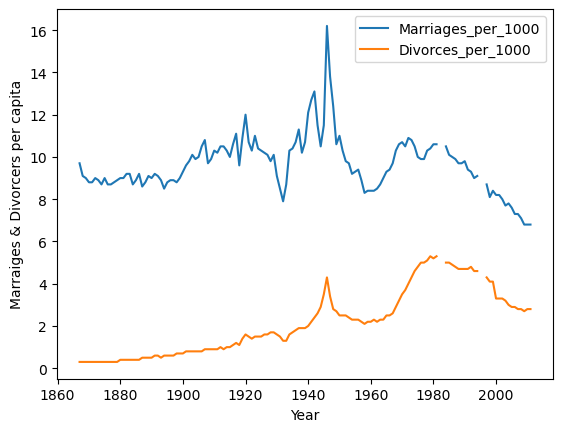

In [50]:
ax=a.plot(x='Year',y=['Marriages_per_1000','Divorces_per_1000'])
ax.set_xlabel('Year')
ax.set_ylabel('Marraiges & Divorcers per capita')

# Question 7

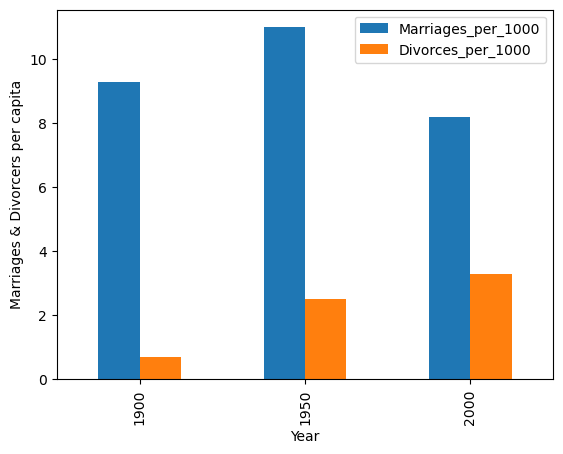

In [51]:
b=a[(a['Year'].isin([1900,1950,2000]))]
x=b.plot.bar(x='Year',y=['Marriages_per_1000','Divorces_per_1000'],xlabel='Year',ylabel='Marriages & Divorcers per capita')

# Question 8

In [52]:
actor=pd.read_csv(r"C:\Users\HP\Desktop\HollywoodActorsKills.csv")
actor

,Actor,Count
0,Arnold Schwarzenegger,370
1,Chow Yun-Fat,300
2,Clive Owen,194
3,Tomisaburo Wakayama,225
4,Wesley Snipes,195
5,Clint Eastwood,209
6,Dolph Lundgren,237
7,Nicolas Cage,204


In [53]:
actor.shape

(8, 2)

Text(0.5, 0, 'Kill Count')

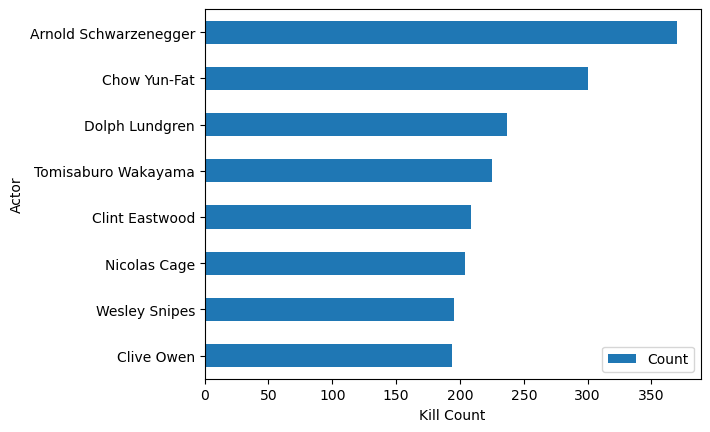

In [54]:
a=actor.set_index('Actor').sort_values('Count').plot(kind='barh')
a.set_xlabel('Kill Count')

In [55]:
roman=pd.read_csv(r'C:\Users\HP\Desktop\RomanEmperorsDeath.csv')
roman

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide
...,...,...,...
63,Valentinian I,11.00,Natural causes
64,Valens,14.00,Killed in battle
65,Gratian,16.00,Assassinated
66,Valentinian II,17.00,Possibly assassinated


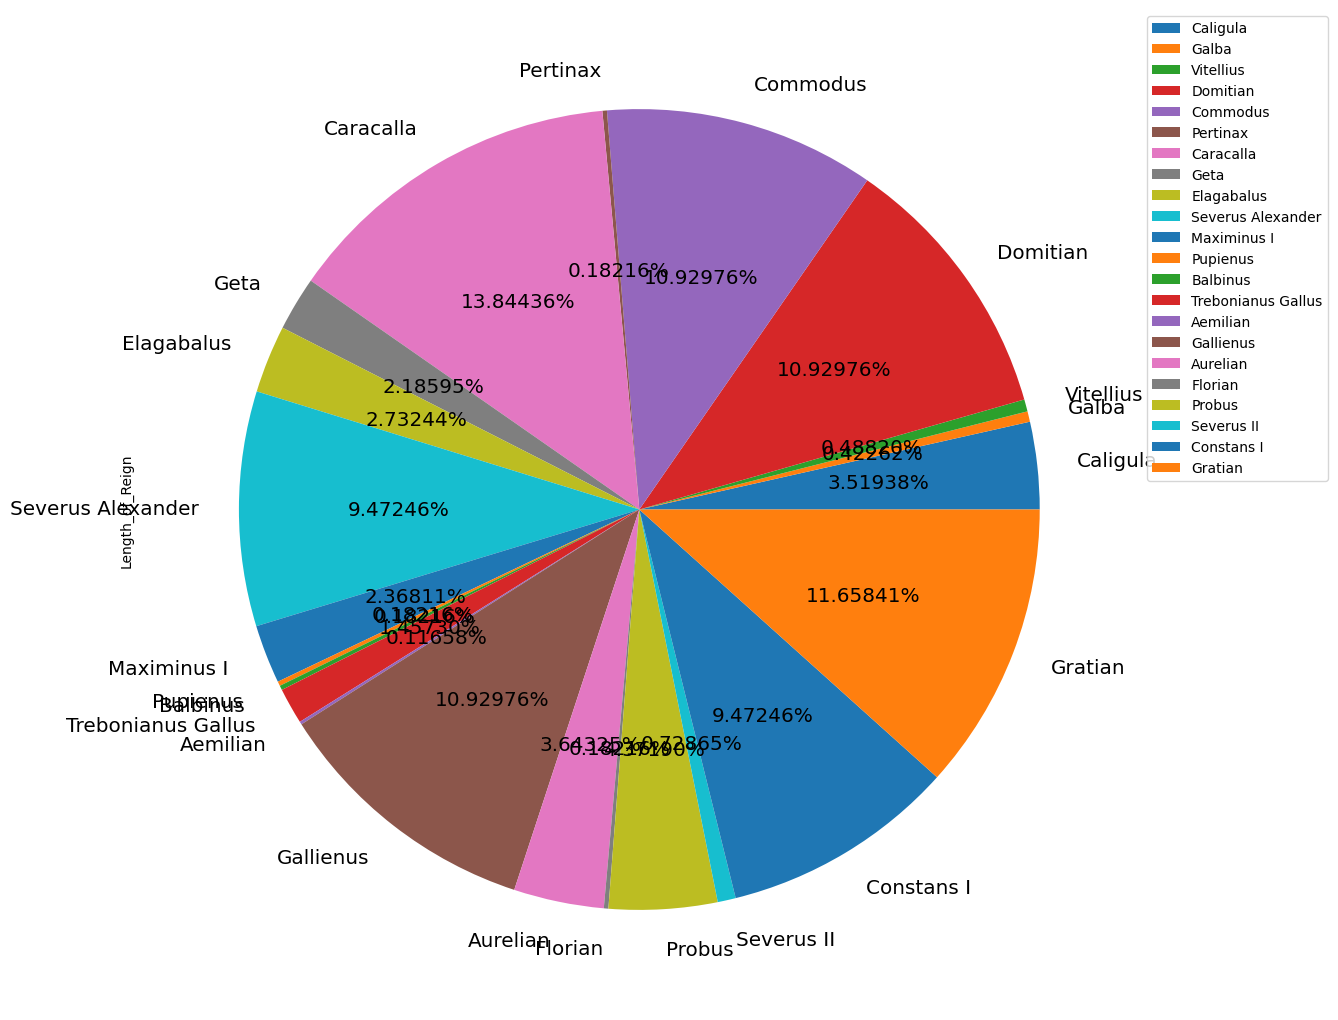

In [56]:
r1=roman[(roman['Cause_of_Death']=='Assassinated')].set_index('Emperor')
r=r1.plot(kind='pie',x='Emperor',y='Length_of_Reign',figsize=(13,13),autopct='%1.5f%%',fontsize='x-large').legend(bbox_to_anchor=(1,1))

In [57]:
import seaborn as sns
cs=pd.read_csv(r"C:\Users\HP\Desktop\Doctorates_Years.csv")
cs

,Year,TotalArcadeRevenueInBillions,ComputerScienceDoctoratesAwarded
0,2000.0,1.196,861
1,2001.0,1.176,830
2,2003.0,1.269,809
3,2004.0,1.240,867
4,2005.0,1.307,948
5,2006.5,1.435,1129
6,2007.8,1.601,1453
7,2009.1,1.654,1656
8,2010.4,1.803,1787
9,NaN,1.734,1611


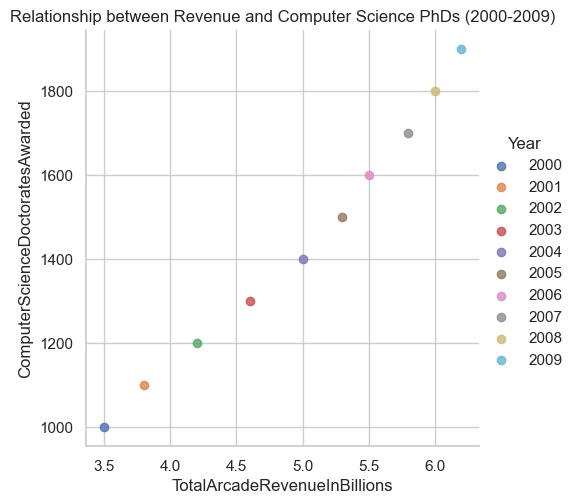

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.DataFrame({
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009],
    'TotalArcadeRevenueInBillions': [3.5, 3.8, 4.2, 4.6, 5.0, 5.3, 5.5, 5.8, 6.0, 6.2],
    'ComputerScienceDoctoratesAwarded': [1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900]
})
sns.set(style='whitegrid')
sns.lmplot(
    x='TotalArcadeRevenueInBillions',
    y='ComputerScienceDoctoratesAwarded',
    data=data,
    hue='Year',
    fit_reg=False
)
plt.xlabel('TotalArcadeRevenueInBillions')
plt.ylabel('ComputerScienceDoctoratesAwarded')
plt.title('Relationship between Revenue and Computer Science PhDs (2000-2009)')
plt.show()
